In [70]:
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans #KMEANS OMP DURUM ANALIZI ICIN.
import warnings #HATA YONETIMI ICIN.
import numpy as nmp
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.cluster import DBSCAN

In [71]:
iris_dataset = sns.load_dataset("iris")

In [72]:
print(iris_dataset)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [73]:
iris_dataset.head()
print("##############DATA INFO##############")
iris_dataset.info()
print("#####################################")

##############DATA INFO##############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
#####################################


In [74]:
iris_dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [75]:
iris_dataset.describe()
iris_dataset.columns
print("##############DATA COLUMNS##############")
print(iris_dataset.columns)
print("##############DATA DESCRIBE#############")
print(iris_dataset.describe())
print("##############DATA NULL?################")
iris_dataset.isnull().sum()

##############DATA COLUMNS##############
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
##############DATA DESCRIBE#############
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
##############DATA NULL?################


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [76]:
iris_dataset['species'].unique()
print(iris_dataset['species'].unique())

['setosa' 'versicolor' 'virginica']


In [77]:
print(iris_dataset.head(20))

    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8         

In [78]:
iris_dataset.iloc[2,4] = 'virginica'
iris_dataset.iloc[7,4] = 'virginica'
iris_dataset.iloc[9,4] = 'virginica'
iris_dataset.iloc[11,4] = 'virginica'

In [79]:
print(iris_dataset.head(20))

    sepal_length  sepal_width  petal_length  petal_width    species
0            5.1          3.5           1.4          0.2     setosa
1            4.9          3.0           1.4          0.2     setosa
2            4.7          3.2           1.3          0.2  virginica
3            4.6          3.1           1.5          0.2     setosa
4            5.0          3.6           1.4          0.2     setosa
5            5.4          3.9           1.7          0.4     setosa
6            4.6          3.4           1.4          0.3     setosa
7            5.0          3.4           1.5          0.2  virginica
8            4.4          2.9           1.4          0.2     setosa
9            4.9          3.1           1.5          0.1  virginica
10           5.4          3.7           1.5          0.2     setosa
11           4.8          3.4           1.6          0.2  virginica
12           4.8          3.0           1.4          0.1     setosa
13           4.3          3.0           1.1     

In [80]:
virginica_df = iris_dataset.loc[iris_dataset['species']=='virginica']
virginica_df = virginica_df.reset_index(drop=True) 

In [81]:
virginica_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.7,3.2,1.3,0.2,virginica
1,5.0,3.4,1.5,0.2,virginica
2,4.9,3.1,1.5,0.1,virginica
3,4.8,3.4,1.6,0.2,virginica
4,6.3,3.3,6.0,2.5,virginica


In [82]:
virginica_np = virginica_df.iloc[:,:4].values
scaler = MinMaxScaler()
virginica_sc = scaler.fit_transform(virginica_np)

##############USER FOLDER##############
##############CUSTOM FOLDER############


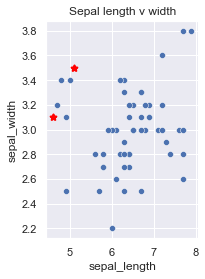

In [83]:
sns.set()
plot.subplot(1,2,1)
sns.scatterplot(data=virginica_df, x='sepal_length', y='sepal_width')
plot.scatter(x=5.1, y=3.5, marker='*', color='red',linewidths = 2.1)
plot.scatter(x=4.6, y=3.1, marker='*', color='red',linewidths = 2.1)
plot.xlabel('sepal_length')
plot.ylabel('sepal_width')
plot.title('Sepal length v width')
print("##############USER FOLDER##############")
plot.savefig('Sepal length v width V-1') 
print("##############CUSTOM FOLDER############")
plot.savefig('C:/Users/user/Desktop/Sepal length v width V-1') 
plot.show()
plot.close()

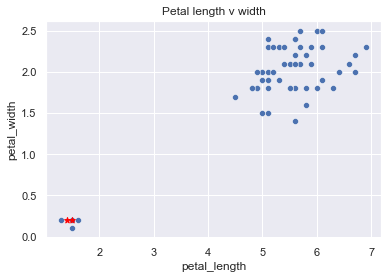

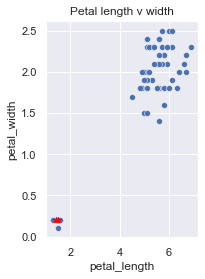

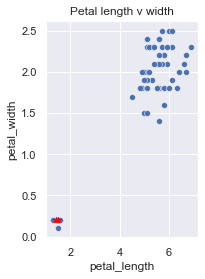

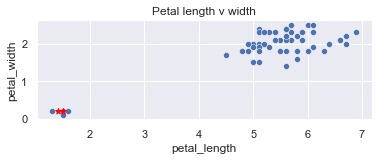

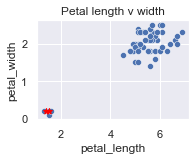

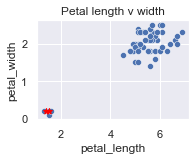

In [84]:
plot.subplot(1,1,1)
sns.scatterplot(data=virginica_df, x='petal_length', y='petal_width')
plot.scatter(x=1.4, y=0.2, marker='*', color='red')
plot.scatter(x=1.5, y=0.2, marker='*', color='red')
plot.xlabel('petal_length')
plot.ylabel('petal_width')
plot.title('Petal length v width')
plot.show()

plot.subplot(1,2,1)
sns.scatterplot(data=virginica_df, x='petal_length', y='petal_width')
plot.scatter(x=1.4, y=0.2, marker='*', color='red')
plot.scatter(x=1.5, y=0.2, marker='*', color='red')
plot.xlabel('petal_length')
plot.ylabel('petal_width')
plot.title('Petal length v width')
plot.show()

plot.subplot(1,2,2)
sns.scatterplot(data=virginica_df, x='petal_length', y='petal_width')
plot.scatter(x=1.4, y=0.2, marker='*', color='red')
plot.scatter(x=1.5, y=0.2, marker='*', color='red')
plot.xlabel('petal_length')
plot.ylabel('petal_width')
plot.title('Petal length v width')
plot.show()

plot.subplot(2,1,1)
sns.scatterplot(data=virginica_df, x='petal_length', y='petal_width')
plot.scatter(x=1.4, y=0.2, marker='*', color='red')
plot.scatter(x=1.5, y=0.2, marker='*', color='red')
plot.xlabel('petal_length')
plot.ylabel('petal_width')
plot.title('Petal length v width')
plot.show()

plot.subplot(2,2,1)
sns.scatterplot(data=virginica_df, x='petal_length', y='petal_width')
plot.scatter(x=1.4, y=0.2, marker='*', color='red')
plot.scatter(x=1.5, y=0.2, marker='*', color='red')
plot.xlabel('petal_length')
plot.ylabel('petal_width')
plot.title('Petal length v width')
plot.show()

plot.subplot(2,2,2)
sns.scatterplot(data=virginica_df, x='petal_length', y='petal_width')
plot.scatter(x=1.4, y=0.2, marker='*', color='red')
plot.scatter(x=1.5, y=0.2, marker='*', color='red')
plot.xlabel('petal_length')
plot.ylabel('petal_width')
plot.title('Petal length v width')
plot.show()

In [85]:
#OMP_NUM_THREADS UYARISI ICIN KULLANILDI.

#1 YONTEM-KULLANIM
warnings.filterwarnings(action='once')

#2 YONTEM-KULLANIM
warnings.filterwarnings('ignore')

#MULTITHREAD DETAYLARI
#http://scv.bu.edu/examples/python/examples/parallel/multithread/

##############USER FOLDER##############
##############CUSTOM FOLDER############


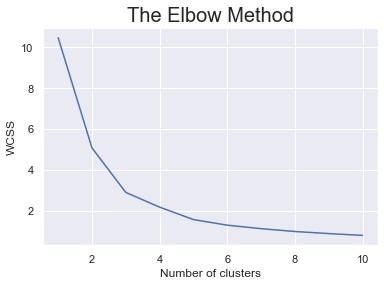

In [86]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(virginica_sc)
    wcss.append(kmeans.inertia_)
plot.plot(range(1, 11), wcss)
plot.title('The Elbow Method',fontsize=20)
plot.xlabel('Number of clusters')
plot.ylabel('WCSS')
print("##############USER FOLDER##############")
plot.savefig('The Elbow Method') 
print("##############CUSTOM FOLDER############")
plot.savefig('C:/Users/user/Desktop/The Elbow Method') 
plot.show()

In [87]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 2).fit(virginica_sc)

In [88]:
virginica_sc_clusters = kmeans.predict(virginica_sc)
virginica_sc_clusters_centers = kmeans.cluster_centers_
dist = [nmp.linalg.norm(x-y) for x, y in zip(virginica_sc, virginica_sc_clusters_centers[virginica_sc_clusters])]

In [89]:
print("##############virginica_sc_clusters##############")
print(virginica_sc_clusters)
print(f"\n")
print("##############dist##############")
print(dist)
print(f"\n")
print("##############dist info##############")
print("MIN: "),print(nmp.min(list(dist)))
print("MAX: "),print(nmp.max(list(dist)))
print("AVG: "),print(nmp.average(list(dist)))
print("MED: "),print(nmp.median(list(dist)))

##############virginica_sc_clusters##############
[2 2 2 2 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1
 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1]


##############dist##############
[0.07402432501849947, 0.09181077301375488, 0.11490658639494417, 0.08339310144078967, 0.27301467160846143, 0.10423488051080937, 0.10889543792943861, 0.1343185933617691, 0.18604661966218702, 0.25063980392039015, 0.43110639213104957, 0.255193185433883, 0.2707861645296507, 0.3160000571091599, 0.22232857813865547, 0.1033834669466382, 0.13866711598931838, 0.21547456675859797, 0.24912108967314195, 0.2215097842306066, 0.20568756146950157, 0.47967821360060797, 0.45425030621726215, 0.38018831539615566, 0.07310397416428537, 0.17822809584430885, 0.3539512930067886, 0.08860737628087151, 0.13581384276409064, 0.17132984413599794, 0.08101085853781526, 0.16131900532549187, 0.16039515829754034, 0.2668413341666265, 0.28409609036755185, 0.5035404306399374, 0.18991521892721566, 0.16181242305433863, 0.2255166483372

(None, None)

In [90]:
km_y_pred = nmp.array(dist)
km_y_pred[dist >= nmp.percentile(dist, 95)] = 1
km_y_pred[dist <  nmp.percentile(dist, 95)] = 0

In [91]:
virginica_clus = pd.concat([virginica_df,
                 pd.DataFrame(virginica_sc_clusters,columns=['Clusters'])],axis=1)

In [92]:
print(virginica_clus.head(10))

   sepal_length  sepal_width  petal_length  petal_width    species  Clusters
0           4.7          3.2           1.3          0.2  virginica         2
1           5.0          3.4           1.5          0.2  virginica         2
2           4.9          3.1           1.5          0.1  virginica         2
3           4.8          3.4           1.6          0.2  virginica         2
4           6.3          3.3           6.0          2.5  virginica         0
5           5.8          2.7           5.1          1.9  virginica         1
6           7.1          3.0           5.9          2.1  virginica         0
7           6.3          2.9           5.6          1.8  virginica         1
8           6.5          3.0           5.8          2.2  virginica         0
9           7.6          3.0           6.6          2.1  virginica         0


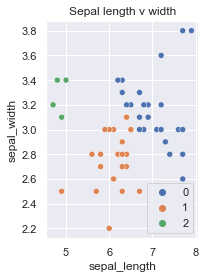

In [93]:
plot.subplot(1,2,1)
sns.scatterplot(data=virginica_clus, x='sepal_length', y='sepal_width', hue='Clusters', palette='deep')
plot.xlabel('sepal_length')
plot.ylabel('sepal_width')
plot.legend( loc='lower right')
plot.title('Sepal length v width')
plot.show()

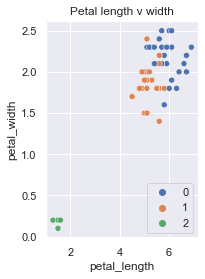

In [94]:
plot.subplot(1,2,2)
sns.scatterplot(data=virginica_clus, x='petal_length', y='petal_width', hue='Clusters', palette='deep')
plot.xlabel('petal_length')
plot.ylabel('petal_width')
plot.legend(loc='lower right')
plot.title('Petal length v width')
plot.show()

In [95]:
dbs = DBSCAN(eps=0.75, min_samples=2, n_jobs=-1).fit(virginica_sc)

In [96]:
pred_labels = dbs.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)

In [97]:
print("##############pred_labels##############")
print(pred_labels)
print(f"\n")
print("##############n_clusters###############")
print(n_clusters)
print(f"\n")
print("##############info#####################")
print('Tahmini küme sayısı: %d' % n_clusters)

##############pred_labels##############
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


##############n_clusters###############
2


##############info#####################
Tahmini küme sayısı: 2


In [98]:
virginica_db = pd.concat([virginica_clus,pd.DataFrame(pred_labels,columns=['dbs_cluster'])],axis=1)

In [99]:
virginica_db.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species,Clusters,dbs_cluster
0,4.7,3.2,1.3,0.2,virginica,2,0
1,5.0,3.4,1.5,0.2,virginica,2,0
2,4.9,3.1,1.5,0.1,virginica,2,0
3,4.8,3.4,1.6,0.2,virginica,2,0
4,6.3,3.3,6.0,2.5,virginica,0,1
5,5.8,2.7,5.1,1.9,virginica,1,1
6,7.1,3.0,5.9,2.1,virginica,0,1
7,6.3,2.9,5.6,1.8,virginica,1,1
8,6.5,3.0,5.8,2.2,virginica,0,1
9,7.6,3.0,6.6,2.1,virginica,0,1
